<a href="https://colab.research.google.com/github/dhanuhkumardk112/Reinforcement-learning/blob/main/dhanushk_assignment1_part1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 15.3 MB/s eta 0:00:00


In [2]:
from google.colab import widgets
import gymnasium as gym
import copy
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time


class DeterministicEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # Define action and observation space
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(12)

        # Define state transition matrix
        self.transition_matrix = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 0, 0, 1]])

        # Define reward matrix
        self.rewards = np.array([0.5,1,1.5,3])

        self.current_state = None
        self.time_step = None
        self.reward = None
        self.done = None

    def step(self, action):
        assert self.action_space.contains(action)
        self.current_state = int(self.current_state)
        action = int(action)

        # Update state
        print(self.current_state)
        print(action)
        print("----------------------------------")
        print(self.transition_matrix[self.current_state, action])
        self.current_state = np.argmax(self.transition_matrix[self.current_state, action])
        print(self.current_state)

        # Get reward
        self.reward = self.rewards[self.current_state]

        # Increment time step
        self.time_step += 1

        # Define termination criteria
        self.done = self.time_step >= 10

        return self.current_state, self.reward, self.done, {}

    def reset(self):
        self.current_state = np.random.randint(0, 12)
        self.time_step = 0
        self.reward = 0
        self.done = False
        return self.current_state

    def render(self, mode='human'):
        # Define gridworld
        gridworld = np.zeros((3, 4))
        for i in range(3):
            for j in range(4):
                gridworld[i, j] = i*4 + j

        # Set current position
        x, y = self.current_state // 4, self.current_state % 4
        gridworld[x, y] = -1

        # Set rewards
        for i, reward in enumerate(self.rewards):
            x, y = i // 4, i % 4
            gridworld[x, y] = reward

        # Define color map
        cmap = plt.cm.get_cmap('viridis', len(self.rewards) + 1)
        cmap.set_under(color='black')

        # Plot gridworld
        plt.imshow(gridworld, cmap=cmap, vmin=-1, vmax=len(self.rewards))
        plt.xticks([])
        plt.yticks([])
        plt.colorbar(ticks=list(range(len(self.rewards) + 1)))
        plt.show()

# Deterministic Environment

1
10
1
----------------------------------
0
0


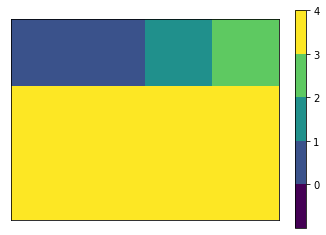

0
0
0
----------------------------------
1
0


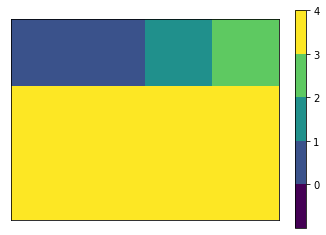

0
0
0
----------------------------------
1
0


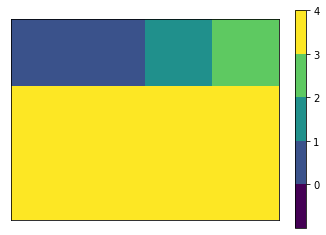

1
0
1
----------------------------------
0
0


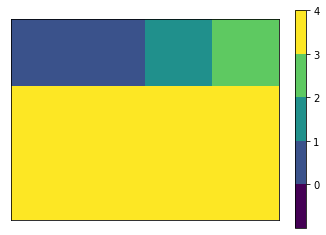

2
0
2
----------------------------------
0
0


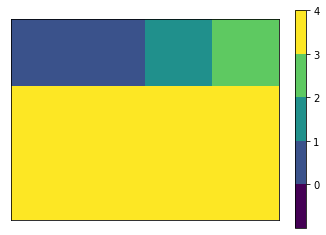

1
0
1
----------------------------------
0
0


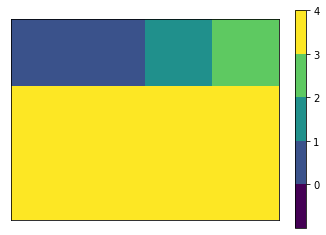

1
0
1
----------------------------------
0
0


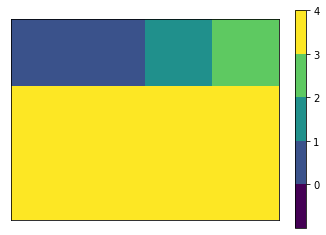

1
0
1
----------------------------------
0
0


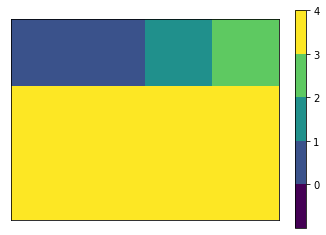

2
0
2
----------------------------------
0
0


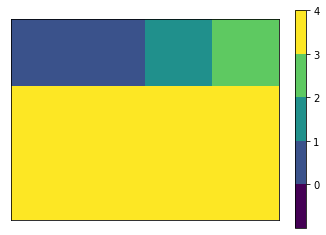

3
0
3
----------------------------------
0
0


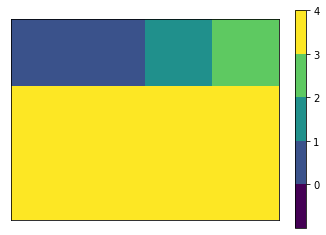

In [3]:
import gym

# create an instance of the deterministic environment
env = DeterministicEnv()

# reset the environment to get the initial state
state = env.reset()

# run the environment for 10 timesteps with random actions
for i in range(10):
    # choose a random action from the action space
    action = env.action_space.sample()
    print(action)
    
    # take a step in the environment with the chosen action
    next_state, reward, done, info = env.step(action)
    
    # visualize the current state of the environment
    env.render()
    
    # break the loop if the environment is done
    if done:
        break

# close the environment
env.close()


# Stochastic Environment

In [4]:
import random
import gym
from gym import spaces
import numpy as np


class StochasticEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # Define action and observation space
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(12)

        # Define state transition probability matrix
        self.transition_probs = np.zeros((12, 4, 12))
        for i in range(12):
            for j in range(4):
                self.transition_probs[i, j, (i+j+1)%12] = 1

        # Define reward matrix
        self.rewards = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 0, 0, 1]])

        self.current_state = None
        self.time_step = None
        self.reward = None
        self.done = None

    def step(self, action):
        assert self.action_space.contains(action)
        self.current_state = int(self.current_state)
        action = int(action)

        # Define stochasticity - action has a 25% chance of leading to a different state
        if random.random() < 0.25:
            action = random.choice([i for i in range(4) if i != action])

        # Update state
        self.current_state = np.random.choice(
            np.arange(12), p=self.transition_probs[self.current_state, action]
        )

        # Get reward
        self.reward = self.rewards[self.current_state, action]

        # Increment time step
        self.time_step += 1

        # Define termination criteria
        self.done = self.time_step >= 10

        return self.current_state, self.reward, self.done, {}

    def reset(self):
        self.current_state = np.random.randint(0, 12)
        self.time_step = 0
        self.reward = 0
        self.done = False
        return self.current_state

    def render(self, mode='human'):
        # Define gridworld
        gridworld = np.zeros((3, 4))
        for i in range(3):
            for j in range(4):
                gridworld[i, j] = i*4 + j

        # Set current position
        x, y = self.current_state // 4, self.current_state % 4
        gridworld[x, y] = -1

        # Set rewards
        for i, reward in enumerate(self.rewards):
            x, y = i // 4, i % 4
            if reward[action] > 0:
                gridworld[x, y] = reward[action] * 10

        # Define color map
        cmap = plt.cm.get_cmap('YlGn')
        cmap.set_under(color='white')

        # Plot gridworld
        plt.imshow(gridworld, cmap=cmap, vmin=-1, vmax=10)
        plt.xticks([])
        plt.yticks([])
        plt.colorbar(ticks=[0, 10])
        plt.show()    

<ipython-input-4-10f83281e8a0>:92: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGn").copy()
  cmap.set_under(color='white')


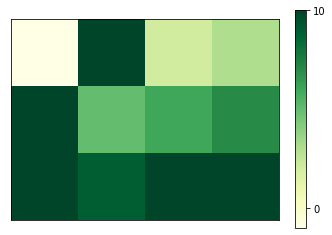

t: 0, observation: 0, reward: 0, done: False, info: {}


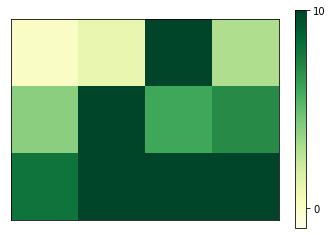

t: 1, observation: 2, reward: 0, done: False, info: {}


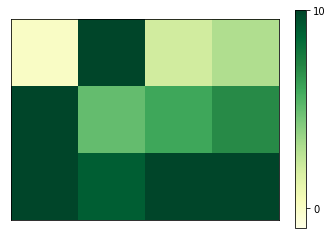

t: 2, observation: 4, reward: 1, done: False, info: {}


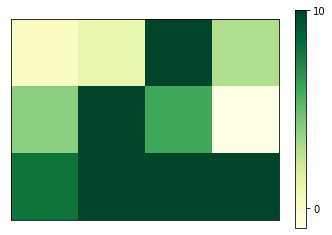

t: 3, observation: 7, reward: 0, done: False, info: {}


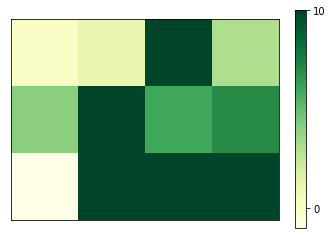

t: 4, observation: 8, reward: 0, done: False, info: {}


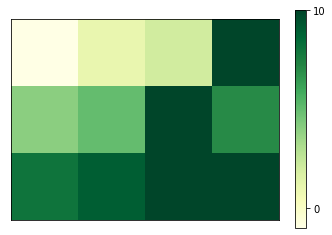

t: 5, observation: 0, reward: 0, done: False, info: {}


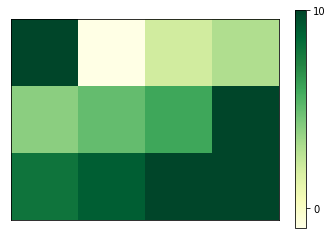

t: 6, observation: 1, reward: 0, done: False, info: {}


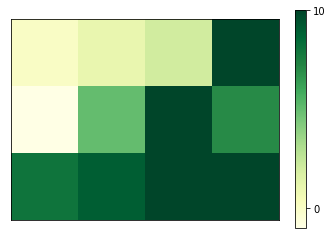

t: 7, observation: 4, reward: 0, done: False, info: {}


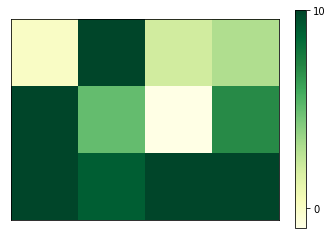

t: 8, observation: 6, reward: 0, done: False, info: {}


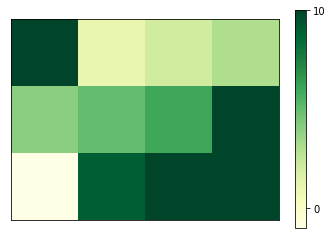

t: 9, observation: 8, reward: 1, done: True, info: {}
Episode finished after 10 timesteps


In [5]:
import gym
import numpy as np

env = StochasticEnv()
observation = env.reset()
for t in range(10):
    action = np.random.randint(0, 4)
    observation, reward, done, info = env.step(action)
    env.render()
    print(f"t: {t}, observation: {observation}, reward: {reward}, done: {done}, info: {info}")
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

#**PART 2**

#Q-Learning Deterministic Env

Streaming output truncated to the last 5000 lines.
1
0
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
2
0
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
0
2
----------------------------------
0
0
0
3
----------------------------------
0
0
0
3
----------------------------------
0
0
5
1
----------------------------------
0
0
0
3
----------------------------------
0
0
0
2

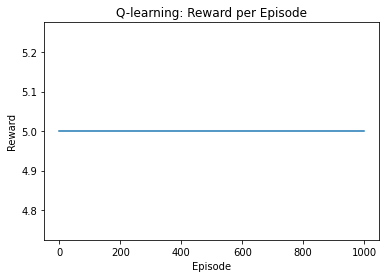

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = DeterministicEnv()


alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 1000


Q = np.zeros([env.observation_space.n, env.action_space.n])


rewards_per_episode = []
steps_per_episode = []


for i in range(num_episodes):
    
    state = env.reset()
    done = False
    total_reward = 0
    step = 0

    while not done:
        step += 1

        
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        
        next_state, reward, done, _ = env.step(action)

        
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        
        total_reward += reward
        state = next_state

  
    rewards_per_episode.append(total_reward)
    steps_per_episode.append(step)


plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning: Reward per Episode')
plt.show()


In [7]:
import pickle


file_path = 'q_table_deterministic.pickle'

with open(file_path, 'wb') as f:
    pickle.dump(Q, f)


#Q-Learning Stochastic Env

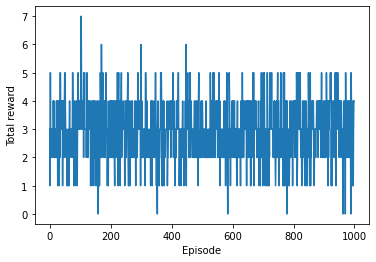

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = StochasticEnv()


Q = np.zeros((env.observation_space.n, env.action_space.n))


alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 1000


episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        if np.random.random() < epsilon:
         
            action = env.action_space.sample()
        else:
       
            action = np.argmax(Q[state])

        next_state, reward, done, _ = env.step(action)

       
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state
        total_reward += reward

    episode_rewards.append(total_reward)


plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()


In [9]:
Q

array([[17.78362714, 10.18797031,  8.07546435,  8.6147383 ],
       [18.38466361, 13.26408208, 13.68481273, 12.86942486],
       [ 9.6814498 , 14.18615851, 18.91134845, 13.89428683],
       [17.28991024,  6.77150006,  5.92321334,  7.18789485],
       [17.75929353,  9.31740477,  8.46358992, 12.53301734],
       [18.06528439, 11.28041755, 14.02651493, 13.12146023],
       [13.35633489, 13.89092094, 18.74305993, 16.17413696],
       [17.50036607,  6.56659374,  5.19730963,  6.78036966],
       [17.70045324,  8.9033322 ,  9.32413831,  9.56684991],
       [18.12671038, 14.40798531, 14.02141513, 14.36904767],
       [18.45712096, 12.38460508, 13.31853789, 12.97833275],
       [ 9.91868184, 18.93604526, 12.46645062, 11.24657041]])

In [10]:
import pickle


file_path = 'q_table_stochastic.pickle'


with open(file_path, 'wb') as f:
    pickle.dump(Q, f)


#SARSA

Streaming output truncated to the last 5000 lines.
7
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
1
----------------------------------
0
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
6
0
----------------------------------
0
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
2
----------------------------------
0
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
0
0
----------------------------------
1
0
5
0
----------------------------------
0
0
0
0
----------------------------------
1
0
0
0

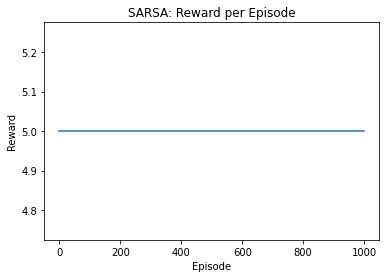

In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = DeterministicEnv()


alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 1000


Q = np.zeros([env.observation_space.n, env.action_space.n])


rewards_per_episode = []
steps_per_episode = []


for i in range(num_episodes):
 
    state = env.reset()
    done = False
    total_reward = 0
    step = 0

 
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])

    while not done:
        step += 1

        
        next_state, reward, done, _ = env.step(action)

  
        if np.random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_state, :])

     
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

    
        total_reward += reward
        state = next_state
        action = next_action

    
    rewards_per_episode.append(total_reward)
    steps_per_episode.append(step)


plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('SARSA: Reward per Episode')
plt.show()


In [12]:
import pickle


file_path = 'sarsa_table_deterministic.pickle'


with open(file_path, 'wb') as f:
    pickle.dump(Q, f)


In [13]:
import gym
import numpy as np


def sarsa(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_episodes=1000):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for i_episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy(Q, state, env.action_space.n, epsilon)
        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy(Q, next_state, env.action_space.n, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state = next_state
            action = next_action
            if done:
                break
    return Q


def epsilon_greedy(Q, state, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(num_actions)
    else:
        return np.argmax(Q[state, :])


env = StochasticEnv()
Q = sarsa(env)


In [14]:
Q

array([[3.42982776, 2.40252943, 2.22488146, 1.97347716],
       [4.04230025, 2.50325665, 2.12576962, 2.27842329],
       [3.1768197 , 3.66062279, 4.62547921, 4.41062954],
       [2.6442466 , 2.27480956, 3.98237249, 2.53200404],
       [3.76357115, 1.67393699, 0.85690037, 1.81270768],
       [4.25693998, 2.5521107 , 2.91260846, 2.40485053],
       [5.16605881, 3.9412854 , 3.55590558, 3.55429639],
       [2.67757383, 2.64623297, 2.83486672, 5.06393128],
       [1.00319073, 2.16051947, 4.24317946, 1.95492459],
       [3.37922115, 1.2901312 , 1.63828167, 1.18311416],
       [4.19272268, 2.37028324, 1.65781848, 2.18068445],
       [3.96512825, 3.69040723, 4.88799119, 3.31111601]])

In [15]:
import pickle


file_path = 'sarsa_table_stochastic.pickle'


with open(file_path, 'wb') as f:
    pickle.dump(Q, f)
